<a href="https://colab.research.google.com/github/LEFT-BEE/KMU-Algorithm/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Covid-19 데이터 분석

### load Data

In [ ]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/국민대/데이터과학/Data
!ls

/content/drive/MyDrive/국민대/데이터과학/Data
꽁치.JPG  owid-covid-data.csv


### Task 1.

In [ ]:
#Task 1-1 , Task 1-2
covid_data = pd.read_csv("./owid-covid-data.csv")
covid_data['date'] = pd.to_datetime(covid_data['date'])

### Task 2.

In [ ]:
kr_data = covid_data.loc[covid_data.location == "South Korea"]
jp_data = covid_data.loc[covid_data.location == "Japan"]

In [ ]:
TCPM_KR = kr_data[["date" , "total_cases_per_million"]]
TCPM_JP = jp_data[["date" , "total_cases_per_million"]]
TCPM = pd.merge(TCPM_KR , TCPM_JP  , on = "date")
TCPM.set_index("date" , inplace = True)
TCPM.rename(columns = {"total_cases_per_million_x" : "Korea" ,
                       "total_cases_per_million_y" : "Japan" } , inplace = True)

NCPM_KR = kr_data[["date" , "new_cases_per_million"]]
NCPM_JP = jp_data[["date" , "new_cases_per_million"]]
NCPM = pd.merge(NCPM_KR , NCPM_JP  , on = "date")
NCPM.set_index("date" , inplace = True)
NCPM.rename(columns = {"new_cases_per_million_x" : "Korea" ,
                       "new_cases_per_million_y" : "Japan" } , inplace = True)


PVPH_KR = kr_data[["date" , "people_vaccinated_per_hundred"]]
PVPH_JP = jp_data[["date" , "people_vaccinated_per_hundred"]]
PVPH = pd.merge(PVPH_KR , PVPH_JP  , on = "date")
PVPH.dropna(inplace = True)
PVPH.set_index("date" , inplace = True)
PVPH.rename(columns = {"people_vaccinated_per_hundred_x" : "Korea" ,
                       "people_vaccinated_per_hundred_y" : "Japan" } , inplace = True)


PFVPH_KR = kr_data[["date" , "people_fully_vaccinated_per_hundred"]]
PFVPH_JP = jp_data[["date" , "people_fully_vaccinated_per_hundred"]]
PFVPH = pd.merge(PFVPH_KR , PFVPH_JP  , on = "date")
PFVPH.dropna(inplace = True)
PFVPH.set_index("date" , inplace = True)
PFVPH.rename(columns = {"people_fully_vaccinated_per_hundred_x" : "Korea" ,
                       "people_fully_vaccinated_per_hundred_y" : "Japan" } , inplace = True)

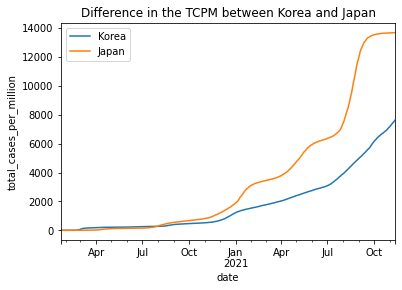

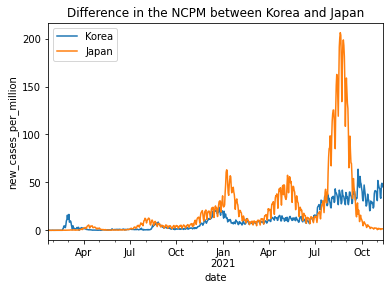

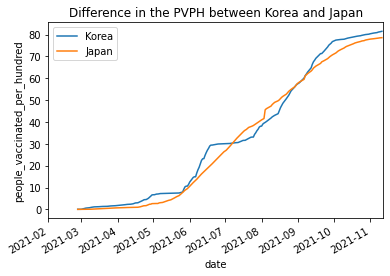

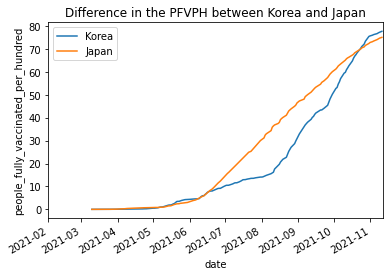

In [ ]:
#Task 2-1.
TCPM.plot()
plt.title("Difference in the TCPM between Korea and Japan")
plt.ylabel("total_cases_per_million")
plt.show()

#Task 2-2.
NCPM.plot()
plt.title("Difference in the NCPM between Korea and Japan")
plt.ylabel("new_cases_per_million")
plt.show()

#Task 2-3.
PVPH.plot()
plt.title("Difference in the PVPH between Korea and Japan")
plt.ylabel("people_vaccinated_per_hundred")
plt.xlim("2021-02-01" , "2021-11-12")
plt.show()

#Task 2-4.
PFVPH.plot()
plt.title("Difference in the PFVPH between Korea and Japan")
plt.ylabel("people_fully_vaccinated_per_hundred")
plt.xlim("2021-02-01" , "2021-11-12")
plt.show()

In [ ]:
#Task 2-3 , 2-4 
#x축을 위 그래프 처럼 깔끔하게 처리하고 싶은데 방법을 몰라 merge한 후 dropna()로 결측치를 없애주었습니다
#혹시 감점요인이 될 수 있을 것 같아 다른 방식으로도 그래프를 그렸습니다.

PVPH_KR = kr_data[["date" , "people_vaccinated_per_hundred"]]
PVPH_JP = jp_data[["date" , "people_vaccinated_per_hundred"]]
PVPH_JP.dropna(inplace = True)

PFVPH_KR = kr_data[["date" , "people_fully_vaccinated_per_hundred"]]
PFVPH_JP = jp_data[["date" , "people_fully_vaccinated_per_hundred"]]
PFVPH = pd.merge(PFVPH_KR , PFVPH_JP  , on = "date")
PFVPH_JP.dropna(inplace = True)

plt.plot(PVPH_KR.date , PVPH_KR.people_vaccinated_per_hundred)
plt.plot(PVPH_JP.date , PVPH_JP.people_vaccinated_per_hundred)
plt.title("Difference in the PVPH between Korea and Japan")
plt.ylabel("people_vaccinated_per_hundred")
plt.show()

plt.plot(PFVPH_KR.date , PFVPH_KR.people_fully_vaccinated_per_hundred)
plt.plot(PFVPH_JP.date , PFVPH_JP.people_fully_vaccinated_per_hundred)
plt.title("Difference in the PFVPH between Korea and Japan")
plt.ylabel("people_fully_vaccinated_per_hundred")
plt.show()

### Task 3.

In [ ]:
#Task 3-1
vaccin_data = covid_data[["location" , "date" , "total_deaths_per_million" , "total_cases_per_million" , 
                          "people_vaccinated_per_hundred", "human_development_index"]]

In [ ]:
#Task 3-2
grouped = vaccin_data.groupby(vaccin_data['location'])
cur_data = grouped.max('date')
cur_data.head()

,total_deaths_per_million,total_cases_per_million,people_vaccinated_per_hundred,human_development_index
location,,,,
Afghanistan,183.053,3928.337,7.78,0.511
Africa,160.463,6228.380,9.53,NaN
Albania,1038.311,66835.159,36.28,0.795
Algeria,133.829,4656.650,14.39,0.748
Andorra,1680.585,204501.383,71.10,0.868


In [ ]:
xy = pd.concat([X,Y] , axis = 1)
xy = xy.dropna()
xy[0][:]

location
Afghanistan    0.046598
Africa         0.025763
Albania        0.015535
Algeria        0.028739
Andorra        0.008218
                 ...   
Vietnam        0.022706
World          0.020152
Yemen          0.193806
Zambia         0.017451
Zimbabwe       0.035206
Name: 0, Length: 197, dtype: float64

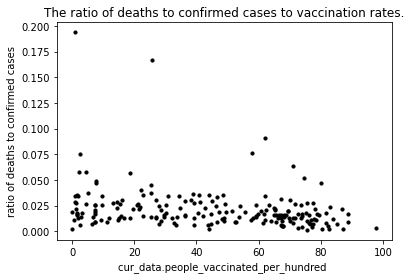

In [ ]:
#Task 3-3
X = cur_data.people_vaccinated_per_hundred 
Y = cur_data.total_deaths_per_million / cur_data.total_cases_per_million

plt.scatter(X,Y,s =10 ,c = 'black')
plt.xlabel("cur_data.people_vaccinated_per_hundred ")
plt.ylabel("ratio of deaths to confirmed cases")
plt.title("The ratio of deaths to confirmed cases to vaccination rates.")
plt.show()

In [ ]:
#Task 3-4.
def findPCC(X,Y):
  x_mean = X.mean()
  y_mean = Y.mean()
  numerator = ((X-x_mean)*(Y - y_mean)).sum()
  denominator = (((X-x_mean)**2).sum()**0.5) * (((Y-y_mean)**2).sum()**0.5)
  if denominator != 0:
    return numerator / denominator
  else:
    return 0

pcc = findPCC(X,Y)
print(pcc)

-0.22912009177815784


In [ ]:
X.corr(Y)

-0.24875842650473193

### Task 4.

In [ ]:
#Task 4-1.
corr_ = cur_data.human_development_index.corr(cur_data.people_vaccinated_per_hundred)
print(corr_)

0.8135760387306881


In [ ]:
#Task 4-2.
test = cur_data[["human_development_index", "people_vaccinated_per_hundred"]]
test = test.dropna()
TRAIN_X = test.human_development_index
TRAIN_Y = test.people_vaccinated_per_hundred
train_x = torch.from_numpy(TRAIN_X.values).unsqueeze(dim = 1).float()
train_y = torch.from_numpy(TRAIN_Y.values).unsqueeze(dim = 1).float()

w = torch.zeros(1,1)
b = torch.randn(1,1)

model = nn.Linear(in_features=1, out_features=1, bias=True)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

for step in range(1001):
    prediction = model(train_x)
    loss = criterion(input=prediction, target=train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

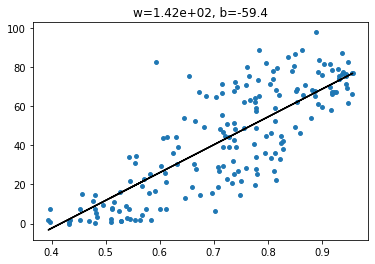

In [ ]:
#Task 4-3/
pre = model(train_x)
plt.scatter(TRAIN_X , TRAIN_Y , s = 15 )
plt.plot(train_x.detach().numpy() , pre.detach().numpy() , c= "black")
plt.title('w={:.3}, b={:.3}'.format(model.weight.data.item(), model.bias.data.item()))
plt.show()